<h2><center>Assignment - 4</center></h2>

In [29]:
# import required Library
import pandas as pd
import numpy as np


#### Q1. 1. Load the dataset and handle any missing data by replacing null values with the mean value of the respective column. (Score 2)

In [30]:
df = pd.read_csv('winequality-red.csv')
df.head(5)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [31]:
# load data with proper formate
for sep in [',',';','\t']:
    df= pd.read_csv("winequality-red.csv",sep=sep)
    if df.shape[1] >=10 :
        break

In [32]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
df.shape

(1599, 12)

In [34]:
# Handling missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### there is no missing values in our dataset, even if we can convert Nan values with mean for better result

In [35]:
num_feature = df.select_dtypes(include=[np.number]).columns.to_list()
num_feature

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [36]:
for i in num_feature:
    if df[i].isna().any():
        df[i].fillna(df[i].mean(),inplace=True)

#### Q2. Extract the following columns as vectors: alcohol,citric acid. (Score 2)

In [46]:
new_df = df[["alcohol", "citric acid"]]
new_df

,alcohol,citric acid
0,9.4,0.00
1,9.8,0.00
2,9.8,0.04
3,9.8,0.56
4,9.4,0.00
...,...,...
1594,10.5,0.08
1595,11.2,0.10
1596,11.0,0.13
1597,10.2,0.12


In [47]:
vector = new_df[["alcohol", "citric acid"]].to_numpy()

In [48]:
print("Converted vector (NumPy array):\n", vector)

Converted vector (NumPy array):
 [[ 9.4   0.  ]
 [ 9.8   0.  ]
 [ 9.8   0.04]
 ...
 [11.    0.13]
 [10.2   0.12]
 [11.    0.47]]


In [49]:
print("\nType of the result:", type(vector))


Type of the result: <class 'numpy.ndarray'>


#### Q3. Select two features (e.g., alcohol and density) from the dataset and calculate the covariance matrix using np.cov(X.T), where X is the feature matrix consisting of the selected columns.(Score 2)

In [55]:
X = df[["alcohol","density"]].to_numpy()

In [56]:
X

array([[ 9.4    ,  0.9978 ],
       [ 9.8    ,  0.9968 ],
       [ 9.8    ,  0.997  ],
       ...,
       [11.     ,  0.99574],
       [10.2    ,  0.99547],
       [11.     ,  0.99549]], shape=(1599, 2))

In [60]:
cov_mat = np.cov(X.T)
cov_mat

array([[ 1.13564740e+00, -9.97951790e-04],
       [-9.97951790e-04,  3.56202945e-06]])

covarience(alcohol,alcohol) = 1.13565 - variance of alcohol values. <br>
covarience(alchoho , density) = -9.97951790e-04 - small negative covariance  <br>
covarience(density,density) = -9.97951790e-04 - variance of density values <br>
covarience(density,alchohol) = 3.56202945e

**Observation:**<br>
     1.alcohol tends to increase slightly as density decreases, hence negative covariance<br>
     2. variance of alcohol across all wines means alcohol values are spread out quite a lot<br>
     3.Negative → when alcohol goes up, density tends to go down (inverse relationship).

#### Q4. Perform eigen decomposition on the covariance matrix you computed in question 3 Identify and interpret the results:Identify the top 2 eigenvalues of the covariance matrix,Identify the corresponding eigenvectors.(Score 2)

In [ ]:
#Eigenvalues and eigenvectors of the covariance matrix.
eigvals, eigvecs = np.linalg.eig(cov_mat)
# sort descending
order = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[order]
eigvecs_sorted = eigvecs[:, order]
print(eigvals_sorted,eigvecs_sorted)

[1.13564827e+00 2.68507580e-06] [[ 9.99999614e-01  8.78753184e-04]
 [-8.78753184e-04  9.99999614e-01]]


**Observation**<br>
1.The first eigenvalue  1.13565 is much larger than 2.685e-06. That means nearly all the variance in the 2D space [alcohol, density] is along the first eigenvector.<br>
2.The first eigenvector ≈ [0.9999996, -0.00087875] points almost entirely along the alcohol axis (very close to [1, 0]). So alcohol explains almost all variance between these two features; density contributes negligibly to the principal component.

#### Q5. Which wine quality is most common in the dataset? How can you interpret the distribution of wine quality scores? (Score 2)

In [64]:
Quality = df["quality"].value_counts().sort_index()
Quality

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [65]:
most_common_quality = Quality.idxmax()
print(most_common_quality)

5


Most wines have quality = 5 (681 samples), followed by 6 (638). The distribution is concentrated around 5–6, with few 3s and 8s.

### Visualisation<br>

1.Histogram of Wine Quality<br>
2.Scatter plot of alcohol vs density with eigenvectors

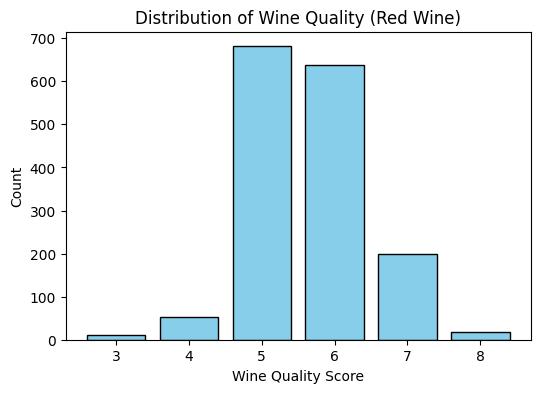

In [71]:
#1.Histogram of Wine Quality
import matplotlib.pyplot as plt
quality_counts = df["quality"].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(quality_counts.index, quality_counts.values, color="skyblue", edgecolor="black")
plt.xlabel("Wine Quality Score")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality (Red Wine)")
plt.show()

##### Histogram (Wine Quality Distribution)<br>

Most common quality score is 5 (681 wines), followed closely by 6 (638 wines).<br>

Very few wines are rated as 3, 4, or 8.<br>

This shows the dataset is centered around medium-quality wines (scores 5–6) with fewer very low- or high-quality wines.<br>

Interpretation: The quality ratings are skewed toward the middle; the dataset may not represent extreme-quality wines well.<br>


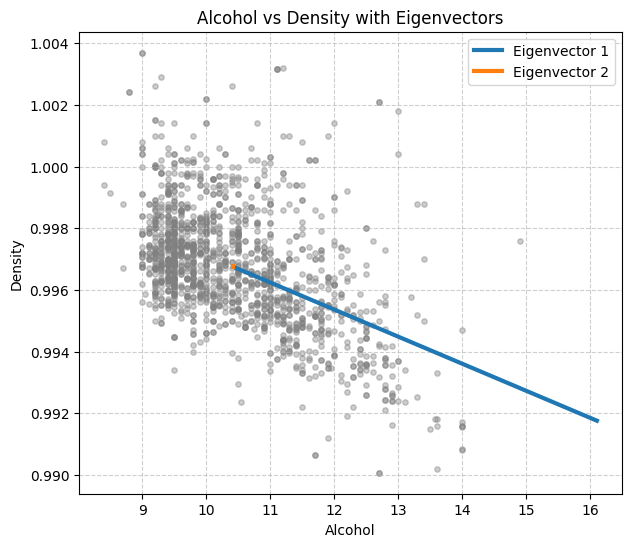

In [73]:
#2.Scatter plot
plt.figure(figsize=(7,6))
plt.scatter(df["alcohol"], df["density"], alpha=0.4, s=15, color="gray")

# Plot eigenvectors from mean point
mean_vec = np.mean(X, axis=0)
for i in range(2):
    vec = eigvecs[:, i] * eigvals[i] * 5   # scale for visibility
    plt.plot([mean_vec[0], mean_vec[0] + vec[0]],
             [mean_vec[1], mean_vec[1] + vec[1]],
             linewidth=3, label=f"Eigenvector {i+1}")

plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.title("Alcohol vs Density with Eigenvectors")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

##### Scatter Plot (Alcohol vs Density with Eigenvectors)<br>

General trend: as alcohol increases, density decreases (negative relationship).<br>

This is confirmed by the negative covariance (-0.000998).<br>

The first eigenvector (long arrow) lies almost along the alcohol axis → meaning alcohol explains nearly all the variation in this 2D feature space.<br>

The second eigenvector (tiny arrow) contributes almost no variance (eigenvalue ≈ 0).<br>

Interpretation: Alcohol is the dominant factor compared to density when explaining variation among wines.